In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import sys
import os
import time

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

读取所用的数据

In [2]:
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,
                                                           housing.target,
                                                           test_size=0.25,
                                                           random_state=7)
x_train, x_val, y_train, y_val = train_test_split(x_train_all,
                                                  y_train_all,
                                                  test_size=0.25,
                                                  random_state=7)
print("train shape: ", x_train.shape)
print("validation shape: ", x_val.shape)
print("test shape: ", x_test.shape)

train shape:  (11610, 8)
validation shape:  (3870, 8)
test shape:  (5160, 8)


使用函数式API实现wide and deep模型

做归一化

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

构建模型

In [9]:
inputs = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputs, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[inputs], outputs=[output])

使用子类API构建模型

In [4]:
class DeepWideModel(keras.models.Model):
    def __init__(self):
        super(DeepWideModel, self).__init__()
        self.hidden1 = keras.layers.Dense(30, activation="relu")
        self.hidden2 = keras.layers.Dense(30, activation="relu")
        self.output_layer = keras.layers.Dense(1)
    def call(self, input):
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
model = DeepWideModel()
model.build(input_shape=(None, 8))

In [7]:
model.layers

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='sgd',loss='mean_squared_error')

开始训练模型

In [6]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 63us/sample - loss: 5.6230 - val_loss: 0.6371
Epoch 2/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5782 - val_loss: 0.4663
Epoch 3/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4823 - val_loss: 0.4367
Epoch 4/10
11610/11610 [==============================] - 0s 35us/sample - loss: 1.7109 - val_loss: 0.4060
Epoch 5/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.7626 - val_loss: 0.4160
Epoch 6/10
11610/11610 [==============================] - 0s 33us/sample - loss: 20609.9498 - val_loss: 15675.2477
Epoch 7/10
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 8/10
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 9/10
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: na

查看history

In [35]:
print("history type:",type(history))
print(history.history)

history type: <class 'tensorflow.python.keras.callbacks.History'>
{'loss': [2.2414572177800265, 0.5366708481398496, 0.4642846742283214, 0.44211164492260324, 0.4102861109451814, 0.38839729609706186, 0.37477654895999213, 0.3618625250968066, 0.36169644176093013, 0.3453662946300073], 'accuracy': [0.7630182, 0.8206364, 0.83583635, 0.8428182, 0.85194546, 0.8600364, 0.8668727, 0.86932725, 0.87136364, 0.8774545], 'val_loss': [0.5362856708526611, 0.5579980314493179, 0.4026535280585289, 0.39917497502565386, 0.4062749324798584, 0.37778860169649126, 0.37311150260567666, 0.376443230676651, 0.3728054626822472, 0.38163680585026744], 'val_accuracy': [0.8336, 0.7996, 0.8626, 0.8548, 0.857, 0.8648, 0.8732, 0.874, 0.8744, 0.8716]}


画出各指标的变化趋势

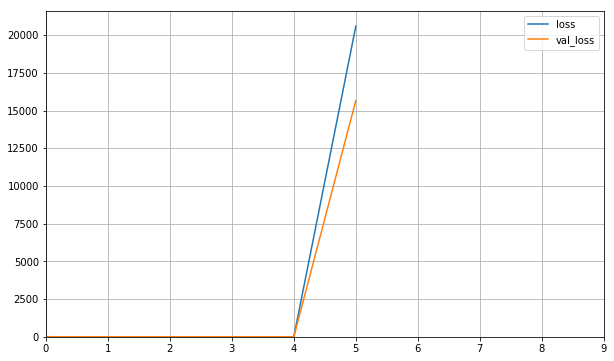

In [7]:
def curves(history):
    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0.1)
    plt.show()
curves(history)

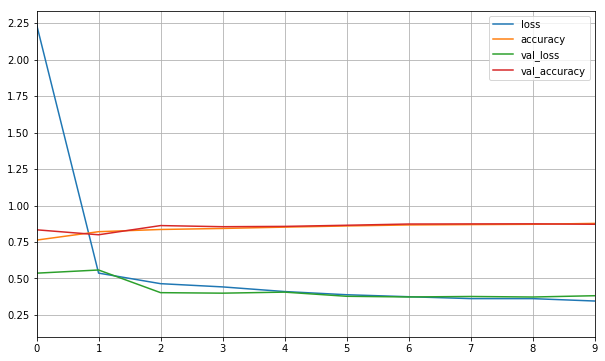

In [36]:
curves(history)